# <center>Aerofit Business Case Study</center>

## Data

The analysis was done on the data located at - https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv

## Libraries
Below are the libraries required for analysing and visualizing data

In [1]:
# libraries to analyze data
import numpy as np
import pandas as pd

# libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

## Data loading and initial analysis

Loading the data into Pandas dataframe for easily handling of data

In [2]:
# read the aerofit_treadmill.csv file into a pandas dataframe
df = pd.read_csv('aerofit_treadmill.csv')
# look at the datatypes of the columns
print(df.info())
print('*************************************************\n')
print(f'Shape of the dataset is {df.shape}')
print('*************************************************\n')
print(f'Number of nan/null values in each column: \n{df.isna().sum()}')
print('*************************************************\n')
print(f'Number of unique values in each column: \n{df.nunique()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB
None
*************************************************

Shape of the dataset is (180, 9)
*************************************************

Number of nan/null values in each column: 
Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64
*****

A quick look at the information of the data reviles that there are **180 rows and 9 columns** implying 180 products have been sold to different customers with information of each customer like *age, gender, income* to name a few. The datatype of *product, gender and marital status* is “object” and rest is of *int64* datatype. We can also infer that **there are no missing values or nulls** in the dataset. \
\
A smaple of the data is shown below:

In [3]:
# look at the top 5 rows
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


The above table shows the statistics of the data like mean, minimum and maximum value. As we can see there is a large spread in the Icome and Miles data.

# Analysis
## Detecting outliers
### a. Outliers for every continuous variable

In [5]:
# helper function to detect outliers 
def detectOutliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    outliers = df[(df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr))]
    return outliers

In [6]:
numerical_columns = ['Age', 'Education', 'Usage', 'Income', 'Miles']
num_of_outliers_per_column = []
for column in numerical_columns:
    print(f'Outliers of \'{column}\' column are:')
    outliers = detectOutliers(df[column])
    print(outliers)
    num_of_outliers_per_column.append(len(outliers))

Outliers of 'Age' column are:
78     47
79     50
139    48
178    47
179    48
Name: Age, dtype: int64
Outliers of 'Education' column are:
156    20
157    21
161    21
175    21
Name: Education, dtype: int64
Outliers of 'Usage' column are:
154    6
155    6
162    6
163    7
164    6
166    7
167    6
170    6
175    6
Name: Usage, dtype: int64
Outliers of 'Income' column are:
159     83416
160     88396
161     90886
162     92131
164     88396
166     85906
167     90886
168    103336
169     99601
170     89641
171     95866
172     92131
173     92131
174    104581
175     83416
176     89641
177     90886
178    104581
179     95508
Name: Income, dtype: int64
Outliers of 'Miles' column are:
23     188
84     212
142    200
148    200
152    200
155    240
166    300
167    280
170    260
171    200
173    360
175    200
176    200
Name: Miles, dtype: int64


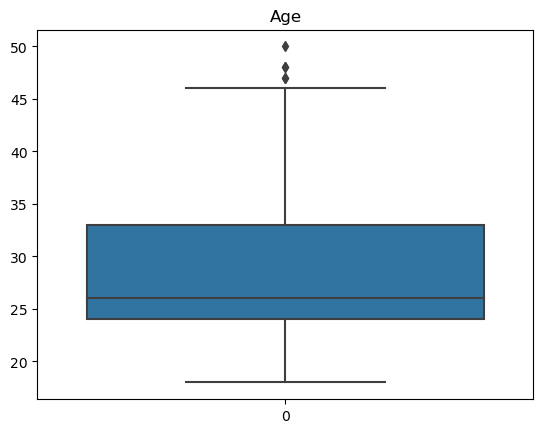

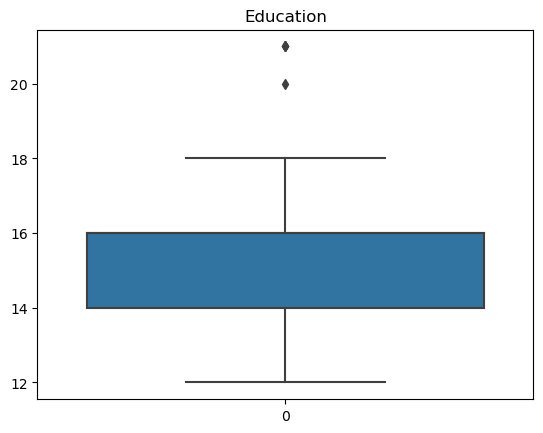

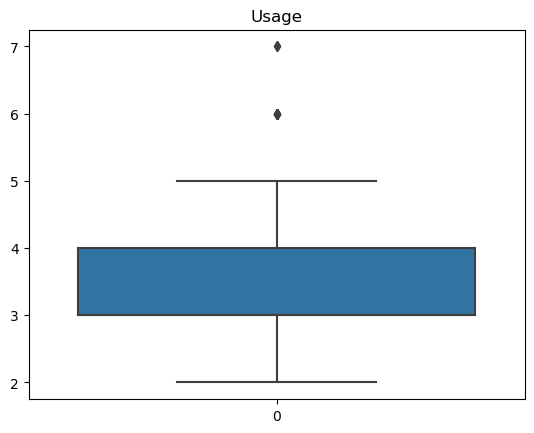

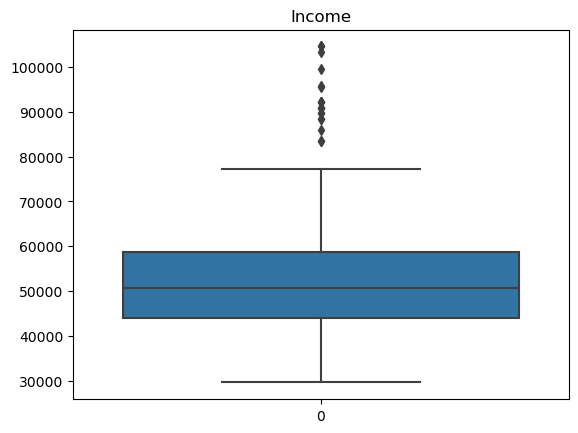

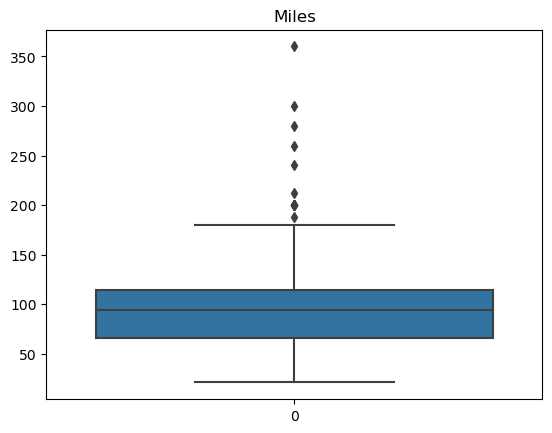

In [7]:
for column in numerical_columns:
    sns.boxplot(data=df[column])
    plt.title(column)
    plt.show()

In [8]:
for idx in range(len(numerical_columns)):
    print(f'The column \'{numerical_columns[idx]}\' has {num_of_outliers_per_column[idx]} outliers')

The column 'Age' has 5 outliers
The column 'Education' has 4 outliers
The column 'Usage' has 9 outliers
The column 'Income' has 19 outliers
The column 'Miles' has 13 outliers


### b. Clip data between 5 and 95 percentile

In [9]:
for column in numerical_columns:
    clip_min = df[column].quantile(0.05)
    clip_max = df[column].quantile(0.95)
    df[column] = np.clip(df[column], clip_min, clip_max)

The data is limited between the 5 and 95 percentile of each column so as to avoid any bias during analysis

## Effect of customer features on product purchased
### a. Relationship between the categorical variables and the product models.

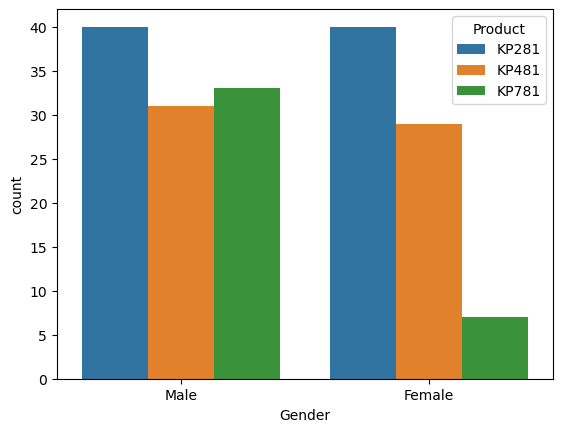

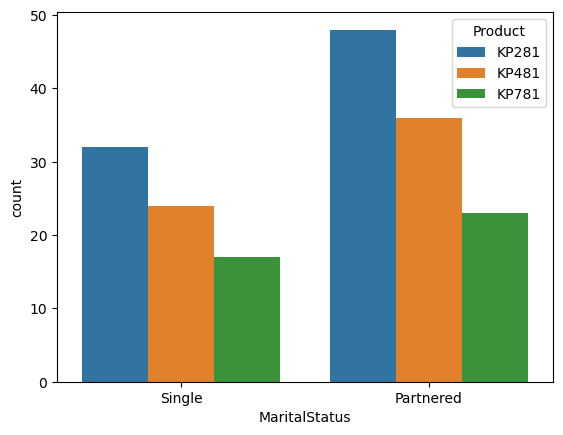

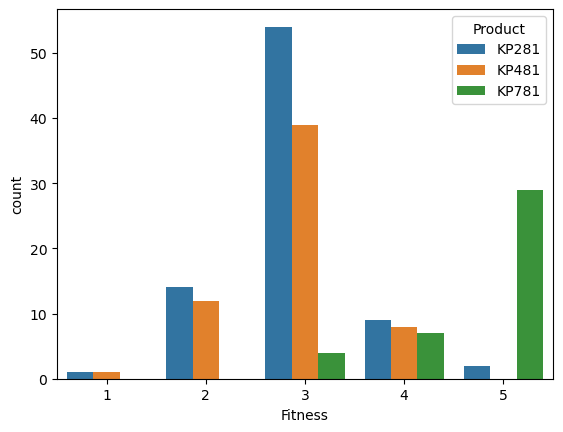

In [10]:
categorical_columns = ['Gender', 'MaritalStatus', 'Fitness']
for column in categorical_columns:
    sns.countplot(data=df, x = column, hue='Product')
    plt.show()

**Both the male and female** customers prefer the product **KP281**. In case of **female** customers, we can see that **majority** of them prefer **KP281 followed by KP481** and **KP781** is the **least prefered product among females** \
**Partnered** customers tend to **buy more products** compared to Single customers across all product models \
**Majority** of the people have rated themselves **moderate fitness**. Interestingly, people who have bought the advanced level treadmill, **KP781**, have rated themselves **high fitness**.

### b. Relationship between the continuous variables and the product models.

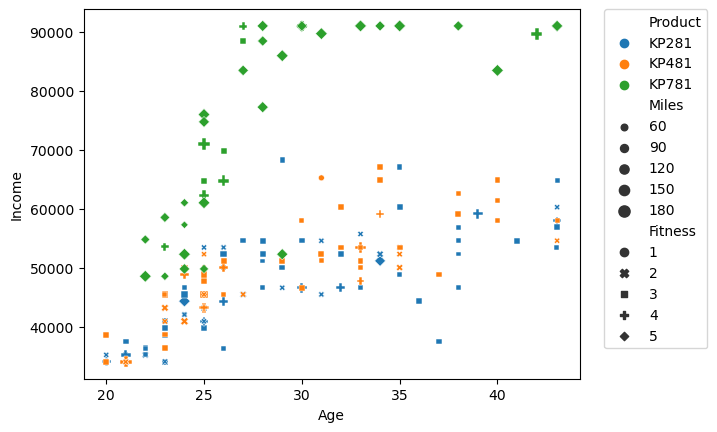

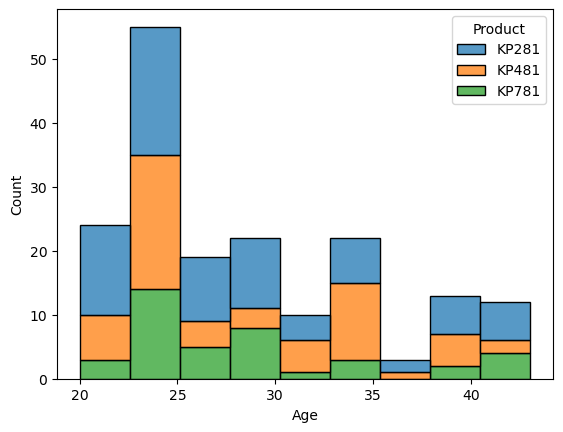

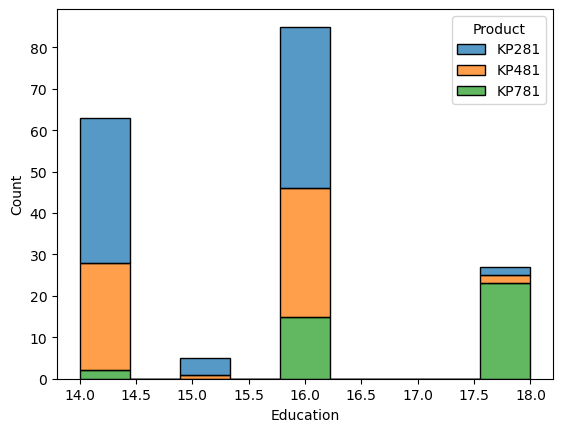

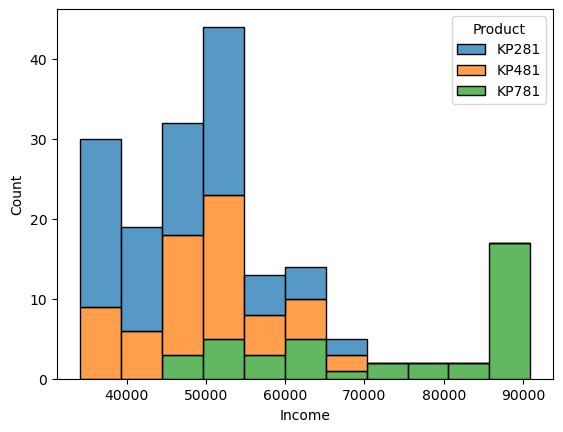

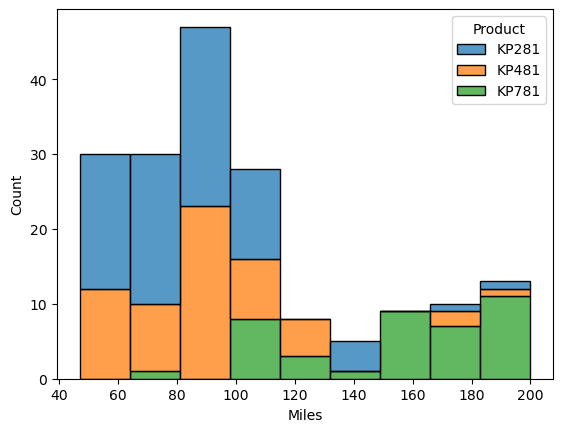

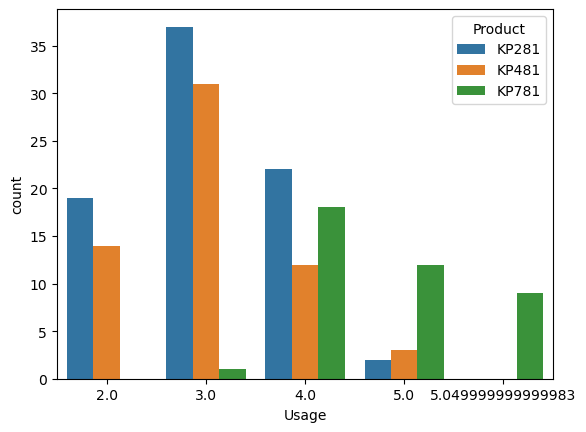

In [11]:
sns.scatterplot(data=df, x = 'Age', y = 'Income', hue='Product', size='Miles', style='Fitness')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

sns.histplot(data=df, x='Age', hue='Product', multiple="stack")
plt.show()

sns.histplot(data=df, x='Education', hue='Product', multiple="stack")
plt.show()

sns.histplot(data=df, x='Income', hue='Product', multiple="stack")
plt.show()

sns.histplot(data=df, x='Miles', hue='Product', multiple="stack")
plt.show()

sns.countplot(data=df, x='Usage', hue='Product')
plt.show()

Customers with higher income and better fitness level prefer to buy KP781 and use it more often and hence run more miles. More comments from the above analysis are added in the customer profiling section.

## Probability
### a. Marginal probability of each product

In [12]:
pd.crosstab(df['Product'], df['Product'], normalize=True)

Product,KP281,KP481,KP781
Product,,,
KP281,0.444444,0.000000,0.000000
KP481,0.000000,0.333333,0.000000
KP781,0.000000,0.000000,0.222222


**44.4%** of customers have purchased **KP281**, **33.3%** have purchased **KP481** and **22.2%** have purchased **KP781**

### b. Probability that the customer buys a product based on each categorical column

In [13]:
pd.crosstab(df['Product'], df['Gender'], margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


Of all the 180 customers who brought a product, 76 were female and 104 were male. So, the **probability of a female customer buying a product is 42.2%** (76/180) and that of a **male customer buying a product is 57.8%** (104/180)

In [14]:
pd.crosstab(df['Product'], df['MaritalStatus'], margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


Similarly, the **probability of a partnered customer buying a product is 59.4%** (107/180) and that of a **single customer buying a product is 40.6%** (73/180)

In [15]:
pd.crosstab(df['Product'], df['Fitness'], margins=True)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


Based on the self rated fitness level, the **probability of a moderately fit customer buying a product is high, 53.9%** (97/180) compared to other fitness level customers

### c. Conditional probability

1. Given that a customer is **female**, the probability that she will buy **KP281** is higher, 52.6% (40/76), than the probability of her buying KP781, 9.2% (7/76).
2. Given that a customer is **male**, the probability that he will buy **KP281**, 38.5% (40/104), is little higher compared to KP481 or KP781 which is almost same, 29.8% (31/104) and 31.7% (33/104) respectively.
3. Given that a customer is **partnered**, the probability of he/she buying **KP281** is 44.9% (48/107), KP481 is 33.6% (36/107)) and KP781 is 21.5% (23/107).
4. Given that a customer is **single**, the probability of he/she buying **KP281** is 43.8% (32/73), KP481 is 32.9% (24/73)) and KP781 is 23.3% (17/73).
5. Given that a customer is **moderately fit**, the probability of he/she buying **KP281** is higher, 55.7% (54/97).
6. Given that a customer is **extremely fit**, the probability of he/she buying **KP781** is higher, 93.5% (29/31).

## Correlation among different factors

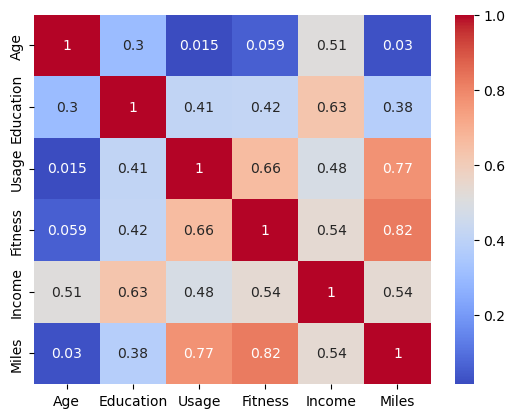

In [16]:
subset_df = df[['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']]
correlation_matrix = subset_df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.show()

From the given dataset, it can be observed that **Fitness** and **Miles** are highly correlated followed by **Usage** and **Miles**. This is expected as fit people tend to use the treadmill more often and run more miles.\
On the other hand, **Age** seems to be unrelated to **Usage, Miles and Fitness** and therby we can conclude that fitness can be achieved at any age

## Customer profiling and recommendation
### a. Customer profilings for each and every product

In [17]:
kp281_df = df[df['Product']=='KP281']
kp481_df = df[df['Product']=='KP481']
kp781_df = df[df['Product']=='KP781']
print('Mean of KP281 features :\n', kp281_df.describe().loc['mean'])
print('\nMean of KP481 features :\n', kp481_df.describe().loc['mean'])
print('\nMean of KP781 features :\n', kp781_df.describe().loc['mean'])

Mean of KP281 features :
 Age             28.42750
Education       15.12500
Usage            3.08750
Fitness          2.96250
Income       46584.31125
Miles           83.12500
Name: mean, dtype: float64

Mean of KP481 features :
 Age             28.801667
Education       15.183333
Usage            3.066667
Fitness          2.900000
Income       49046.607500
Miles           88.500000
Name: mean, dtype: float64

Mean of KP781 features :
 Age             28.82875
Education       17.05000
Usage            4.51125
Fitness          4.62500
Income       73908.28125
Miles          155.90000
Name: mean, dtype: float64


<pre>
For KP281: 
    Age: Prefered by customers of all age.
    Gender: Prefered by both male and female customers equally. 
    Education: Mostly prefered by customers who have completed less than 16 years of education.
    MaritalStatus: Mostly Prefered by partnered customers than single customers. 
    Usage: Prefered by customers who would use the treadmill for less than 4 times/week
    Income: Prefered by low income(46,000 dollars average income) customers. 
    Fitness: Mostly prefered by customers with fitness level less than 3.
    Miles: Mostly prefered by customers who expect to walk/run 82 miles/week on average.
    
For KP481: 
    Age: Prefered by customers of all age.
    Gender: Prefered by both male and female customers equally. 
    Education: Mostly prefered by customers who have completed less than 16 years of education.
    MaritalStatus: Mostly Prefered by partnered customers than single customers. 
    Usage: Prefered by customers who would use the treadmill for less than 4 times/week
    Income: Prefered by low income(49,000 dollars average income) customers. 
    Fitness: Mostly prefered by customers with fitness level less than 3.
    Miles: Mostly prefered by customers who expect to walk/run 88 miles/week on average.
    
For KP781: 
    Age: Prefered by customers of all age.
    Gender: Mostly prefered by male customers. 
    Education: Mostly prefered by customers who have completed greater than 16 years of education.
    MaritalStatus: Mostly Prefered by partnered customers than single customers. 
    Usage: Prefered by customers who would use the treadmill for greater than 4 times/week
    Income: Mostly prefered by high income(75,000 dollars average income) customers. 
    Fitness: Mostly prefered by customers with fitness level 3 and above.
    Miles: Mostly prefered by customers who expect to walk/run 167 miles/week on average.

### b. Recommendation

<pre>
The product KP281 and KP481 should continue to be sold to customers of all age, gender, marital status, low to medium fitness level and with low income. It should be selectively targeted towards customers with low to medium fitness but with high income to pull them into fitness routine and later they will automatically buy advance model, KP781, as cost wouldnt be a factor thereby increasing sale of all models.
The product KP781 is mostly purchased by males with high income and high fitness level. This model should be targeted towards high fitness individuals but with low income by providing easy finance options like 0% EMI or subscription basis. This model should also be targeted towards high income females to increase sales.